## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group dataframe by Drug Regimen
stats_table = mouse_study_df.groupby("Drug Regimen")
# Show Tumor Volume mean
stats_table = stats_table["Tumor Volume (mm3)"]

# Create median of Tumor Volume
volume_median = stats_table.median()

# Create mean of Tumor Volume
volume_mean = stats_table.mean()

# Create variance of Tumor Volume
volume_variance = stats_table.var()

# Crate standard deviation of Tumor Volume
volume_stdev = stats_table.std()

In [3]:
# Create SEM of Tumor Volume

# Rename Tumor Volume Column, to pass through functions more easily
renamed = mouse_study_df.rename(columns={"Tumor Volume (mm3)":"Tumor_Volume"})

# Create samples
nsamples = 10
size = 20
samples = [renamed.sample(size) for x in range(0,nsamples)]

# Calculate means of samples
means = [s.Tumor_Volume.mean() for s in samples]

# Calculate standard error of means
volume_SEM = [sem(s.Tumor_Volume) for s in samples]

In [4]:
# Create summary table as data frame
Summary_Table = pd.DataFrame({
    "Tumor Volume Mean": volume_mean,
    "Tumor Volume Median": volume_median,
    "Tumor Volume Variance": volume_variance,
    "Tumor Volume Standard Deviation": volume_stdev,
    "Tumor Volume SEM": volume_SEM
})
Summary_Table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.744467
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.916510
Infubinol,52.884795,51.820584,43.128684,6.567243,2.620151
Ketapril,55.235638,53.698743,68.553577,8.279709,1.997515
Naftisol,54.331565,52.509285,66.173479,8.134708,1.798597
Placebo,54.033581,52.288934,61.168083,7.821003,2.753745
Propriva,52.322552,50.854632,42.351070,6.507770,1.672330
Ramicane,40.216745,40.673236,23.486704,4.846308,2.024762
Stelasyn,54.233149,52.431737,59.450562,7.710419,2.154892


## Bar plots

Text(0, 0.5, 'Number of Test Subjects per Regimen')

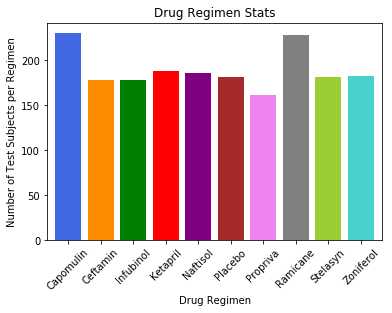

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Use data frame grouped by drug regimen (stats_table). Call count function
regimen_data = stats_table.count()

# Set colors
colors = ["royalblue", "darkorange", "green", "red", "purple", "brown", "violet", "grey", "yellowgreen", "mediumturquoise"]

# Generate plot
regimen_data.plot(kind="bar", width=0.8, color=colors)

# Set tick locations and names
plt.xticks(rotation=45)


# Set a Title and labels
plt.title("Drug Regimen Stats")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Test Subjects per Regimen")

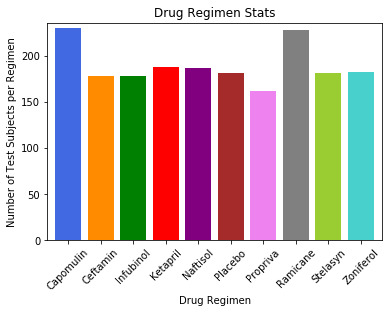

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis values to drug regimen names
regimen_names = regimen_data.index.tolist()

# Set y axis values from regimen data
num_subjects = regimen_data.tolist()

# Set colors
colors = ["royalblue", "darkorange", "green", "red", "purple", "brown", "violet", "grey", "yellowgreen", "mediumturquoise"]

# Set x axis
x_axis = np.arange(len(num_subjects))

# Create plot
plt.bar(x_axis, num_subjects, align="center", color=colors, width=0.8)

# Set tick locations and names
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_names, rotation=45)

# Set a Title and labels
plt.title("Drug Regimen Stats")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Test Subjects per Regimen")

# Set plot margins
plt.margins(0.025)

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001997A3886D8>],
      dtype=object)

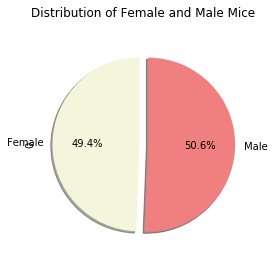

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Isolate mouse sex column as scalar
gender = mouse_study_df["Sex"]

# Find count of female mice
female = gender.loc[gender=="Female"].count()

# Find count of male mice
male = gender.loc[gender=="Male"].count()

# Create dictionary to hold Male/Female count of all data
dictionary = {"Female": [female], "Male": male}

# Convert dictionary to dataframe
gender_df = pd.DataFrame.from_dict({
    "Female": female,
    "Male": male},
     orient="index")

# Set variable to hold colors
colors = ["beige", "lightcoral"]

# Set varible to hold title
title = "Distribution of Female and Male Mice"

# explode
explode = (0.1, 0)

# Generate Pie Chart
gender_df.plot(kind="pie", subplots=True, legend=False, 
            autopct="%1.1f%%", colors=colors, title=title, shadow=True, startangle=90,
           explode = explode)

Text(0.5, 1.0, 'Distribution of Female and Male Mice')

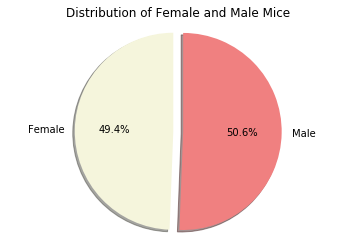

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Isolate mouse sex column as scalar
gender = mouse_study_df["Sex"]

# Find count of female mice
female = gender.loc[gender=="Female"].count()

# Find count of male mice
male = gender.loc[gender=="Male"].count()

# labels for each section of pie chart
labels = ["Female", "Male"]

# values of each section
sizes = [female, male]

# colors of each section of the pie chart
colors = ["beige", "lightcoral"]

# explode
explode = (0.1, 0)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

# Apply title
plt.title("Distribution of Female and Male Mice")

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# DEFINE FUNCTIONS

# Define function to filter out data for drug regimen.  
# Returns re-indexed dataframe for that drug.
def regimen_dataframe(drug_regimen):
    regimen_df = mouse_study_df.loc[
        (mouse_study_df["Drug Regimen"]==drug_regimen), :]     # Create 1 variable to hold dataframe for that drug.
    regimen_df = regimen_df.reset_index(drop=True)             # Reset index for that dataframe, so numbers are continuous.
    return regimen_df                                          # Drop old index, so old index is NOT added as a new column

# Define function to find unique mice for capomulin.  
# Returns unique mice in an array.
def mouse_list(regimen_df):
    unique_mice = regimen_df["Mouse ID"].unique()
    return unique_mice

In [10]:
# Define function to find each mouse's timepoint and tumor volume. 
# Returns dictionary holding mouse IDs, timepoints, and final tumor volumes
def mouse_dict(dataframe, mouse_array):
    
    # Create dictionary to hold each mouse's last time point 
    # as a key and the corresponding tumor volume as a value
    mouse_time_volume = {}
    
    # Create for loop to pull final timepoint and 
    # final tumor volume for each mouse in dataframe.
    for x in range(0,len(dataframe)-1):                          # Loop through all data in mouse dataframe
        time_volume = []                                         # Create empty list to hold timepoint, volume for a mouse
        
        if x == len(dataframe):                                  # If x is last row in dataframe, then:
            mouse = dataframe.iloc[x, 0]                         # set variable to hold name of that mouse
            time = dataframe.iloc[x, 5]                          # set variable to hold that mouse's time point
            volume = dataframe.iloc[x, 6]                        # set variable to hold that mouse's time tumor volume
            time_volume.append(time)                             # Append time point to list
            time_volume.append(volume)                           # Append tumor volume to list
            mouse_time_volume.update({mouse:time_volume})        # Create dictionary to hold mouse ID as key and 
                                                                 # that mouse's timepoint/tumor volume as a value
                
        elif dataframe.iloc[x, 0] == dataframe.iloc[x+1, 0]:     # If mouse ID in 2 consecutive rows is identical, then:
            continue                                             # Do nothing,  skip to next row
            
        else:                                                    # If mouse ID in 2 consecutive rows is different, then:
            mouse = dataframe.iloc[x, 0]                         # add that mouse's ID, timepoint, and tumor volume
            time = dataframe.iloc[x, 5]                          # to the dictionary, using same method
            volume = dataframe.iloc[x, 6]                        # as defined above for the last row.
            time_volume.append(time)
            time_volume.append(volume)
            mouse_time_volume.update({mouse:time_volume})
            
    return mouse_time_volume                                     # Return dictionary

In [11]:
# Define function to convert mouse/timepoint/tumor volume dictionary to dataframe
def mouse_dataframe(mouse_dictionary):
    # Convert dictionary to dataframe.
    # Sets dictionary keys to be the rows
    time_vol_df = pd.DataFrame.from_dict(mouse_dictionary, orient="index")
    
    # Rename columns
    time_vol_df = time_vol_df.rename(columns={
        0:"Timepoint",
        1: "Tumor Volume (mm3)"
    })
    return time_vol_df

In [12]:
# Create a function to calculate quartiles, IQR, and outliers for a given drug and print the drug name.
def quartile_report(regimen, drug_name):
    quartiles = regimen["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    median = round(quartiles[0.5], 2)
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2)
    iqr = round(upperq-lowerq, 2)
    print(f"Summary report for {drug_name}:")
    print(f"    The lower quartile of tumor volumes is: {lowerq}")
    print(f"    The upper quartile of tumor volumes is: {upperq}")
    print(f"    The interquartile range of tumor volumes is: {iqr}")
    print(f"    The median of tumor volumes is: {median} ")

    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    print(f"    Values below {lower_bound} could be outliers.")
    print(f"    Values above {upper_bound} could be outliers.")

In [13]:
# Filter data for mouse ID, timepoint, and tumor volumes into dictionaries and dataframes

# Filter out data for 4 drug regimens.  Create 1 variable to hold data for each drug 
capomulin_df = regimen_dataframe("Capomulin")
ramicane_df = regimen_dataframe("Ramicane")
infubinol_df = regimen_dataframe("Infubinol")
ceftamin_df = regimen_dataframe("Ceftamin")

# Create list of Mouse IDs for each drug regimen 
capomulin_mice = mouse_list(capomulin_df)
ramicane_mice = mouse_list(ramicane_df)
infubinol_mice = mouse_list(infubinol_df)
ceftamin_mice = mouse_list(ceftamin_df)

# Create dictionary of each drug regimen's mouse ID, final timepoint, and tumor volume
capomulin_dict = mouse_dict(capomulin_df, capomulin_mice)
ramicane_dict = mouse_dict(ramicane_df, ramicane_mice)
infubinol_dict = mouse_dict(infubinol_df, infubinol_mice)
ceftamin_dict = mouse_dict(ceftamin_df, ceftamin_mice)

# Create dataframe of each drug regimen's mouse ID, final timepoint, and tumor volume
capomulin_mice_df = mouse_dataframe(capomulin_dict)
ramicane_mice_df = mouse_dataframe(ramicane_dict)
infubinol_mice_df = mouse_dataframe(infubinol_dict)
ceftamin_mice_df = mouse_dataframe(ceftamin_dict)

In [14]:
# Print tumor volume summary reports for each drug regimen
capomulin_report = quartile_report(capomulin_mice_df, "Capomulin")
ramicane_report = quartile_report(ramicane_mice_df, "Ramicane")
infubinol_report = quartile_report(infubinol_mice_df, "Infubinol")
ceftamin_report = quartile_report(ceftamin_mice_df, "Ceftamin")

Summary report for Capomulin:
    The lower quartile of tumor volumes is: 32.26
    The upper quartile of tumor volumes is: 40.0
    The interquartile range of tumor volumes is: 7.74
    The median of tumor volumes is: 37.72 
    Values below 20.65 could be outliers.
    Values above 51.61 could be outliers.
Summary report for Ramicane:
    The lower quartile of tumor volumes is: 31.44
    The upper quartile of tumor volumes is: 39.27
    The interquartile range of tumor volumes is: 7.83
    The median of tumor volumes is: 36.47 
    Values below 19.7 could be outliers.
    Values above 51.02 could be outliers.
Summary report for Infubinol:
    The lower quartile of tumor volumes is: 53.42
    The upper quartile of tumor volumes is: 65.67
    The interquartile range of tumor volumes is: 12.25
    The median of tumor volumes is: 59.22 
    Values below 35.04 could be outliers.
    Values above 84.04 could be outliers.
Summary report for Ceftamin:
    The lower quartile of tumor volumes 

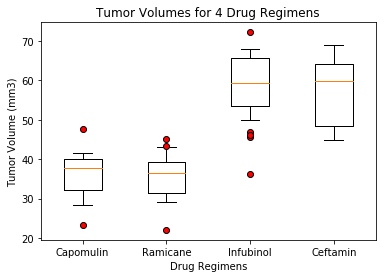

Note: Potential outliers are shown as red circles.


In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create list to hold tumor volume of all 4 regimens
data = [capomulin_mice_df["Tumor Volume (mm3)"], ramicane_mice_df["Tumor Volume (mm3)"], 
        infubinol_mice_df["Tumor Volume (mm3)"], ceftamin_mice_df["Tumor Volume (mm3)"]]

# Set labels
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create markers for potential outliers
red_circle = dict(markerfacecolor='r', marker='o')

# Create subplot
fig1, ax1 = plt.subplots()

# Set titles and axis labels
ax1.set_title('Tumor Volumes for 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimens")

# Show potential outliers, shorten whiskers to make outliers obvious
ax1.boxplot(data, whis=0.5, showfliers=True, flierprops=red_circle, labels=labels, autorange=False)

# Show plot
plt.show()

# Print Caption
print(f"Note: Potential outliers are shown as red circles.")

## Line and scatter plots

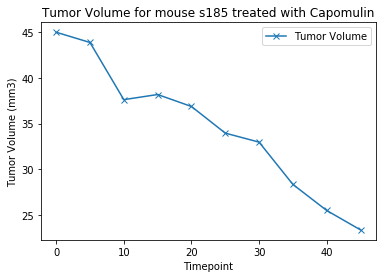

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create dataframe for 1 mouse treated with Capomulin (in this case "s185")
s185_data = capomulin_df[capomulin_df["Mouse ID"]=="s185"]

# Set variables to hold timepoint data and tumor volume
time = s185_data["Timepoint"]
volume = s185_data["Tumor Volume (mm3)"]

# Generate line plot
plt.plot(time, volume, marker="x", label="Tumor Volume")
plt.title("Tumor Volume for mouse s185 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Set legend
plt.legend()

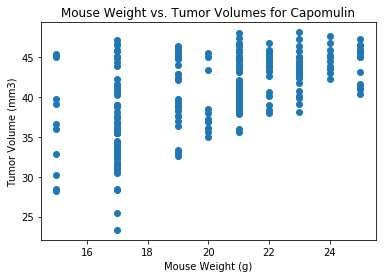

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Set x and y values
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]

# Create scatterplot
plt.scatter(x_values, y_values)

# Set titles and labels
plt.title("Mouse Weight vs. Tumor Volumes for Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()

The correlation between Mouse Weight and Tumor Volume is: 0.53.


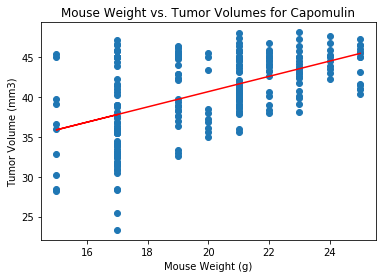

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Set x and y values of scatterplot
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]

# Apply linear regression formula. Set line of linear regression.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create scatterplot
plt.scatter(x_values, y_values)

# Draw linear regression line.
plt.plot(x_values,regress_values,"r-")

# Find and print correlation coefficient.
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between Mouse Weight and Tumor Volume is: {round(correlation[0], 2)}.")

# Set titles and labels
plt.title("Mouse Weight vs. Tumor Volumes for Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()